STATISTICAL ANALYSIS WITH PYTHON

1. Correlation
2. chi square
3. Analysis of varaince
4. kruskai H willis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
rent_data = pd.read_csv('formattedHouseRentData.csv')

rent_data.head(3)

,Unnamed: 0,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,house_floor,no_floor
0,0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


In [3]:
rent_data.describe()

,Unnamed: 0,BHK,Rent,Size,Bathroom,no_floor
count,4742.000000,4742.000000,4.742000e+03,4742.000000,4742.000000,4742.000000
mean,2370.500000,2.083720,3.500863e+04,967.669970,1.966048,6.973429
std,1369.041818,0.832245,7.813758e+04,634.355762,0.884555,9.469727
min,0.000000,1.000000,1.200000e+03,10.000000,1.000000,1.000000
25%,1185.250000,2.000000,1.000000e+04,550.000000,1.000000,2.000000
50%,2370.500000,2.000000,1.600000e+04,850.000000,2.000000,4.000000
75%,3555.750000,3.000000,3.300000e+04,1200.000000,2.000000,6.000000
max,4741.000000,6.000000,3.500000e+06,8000.000000,10.000000,89.000000


In [6]:
rent_data[['City', 'Rent']].groupby(by=['City']).count()

,Rent
City,
Bangalore,886
Chennai,891
Delhi,603
Hyderabad,866
Kolkata,524
Mumbai,972


In [7]:
rent_data[['City', 'Rent']].groupby(by=['City']).sum()


,Rent
City,
Bangalore,22120200
Chennai,19258156
Delhi,17786500
Hyderabad,17811782
Kolkata,6102071
Mumbai,82932211


In [8]:
rent_data[['City', 'Rent']].count()


City    4742
Rent    4742
dtype: int64

<Axes: xlabel='City', ylabel='BHK'>

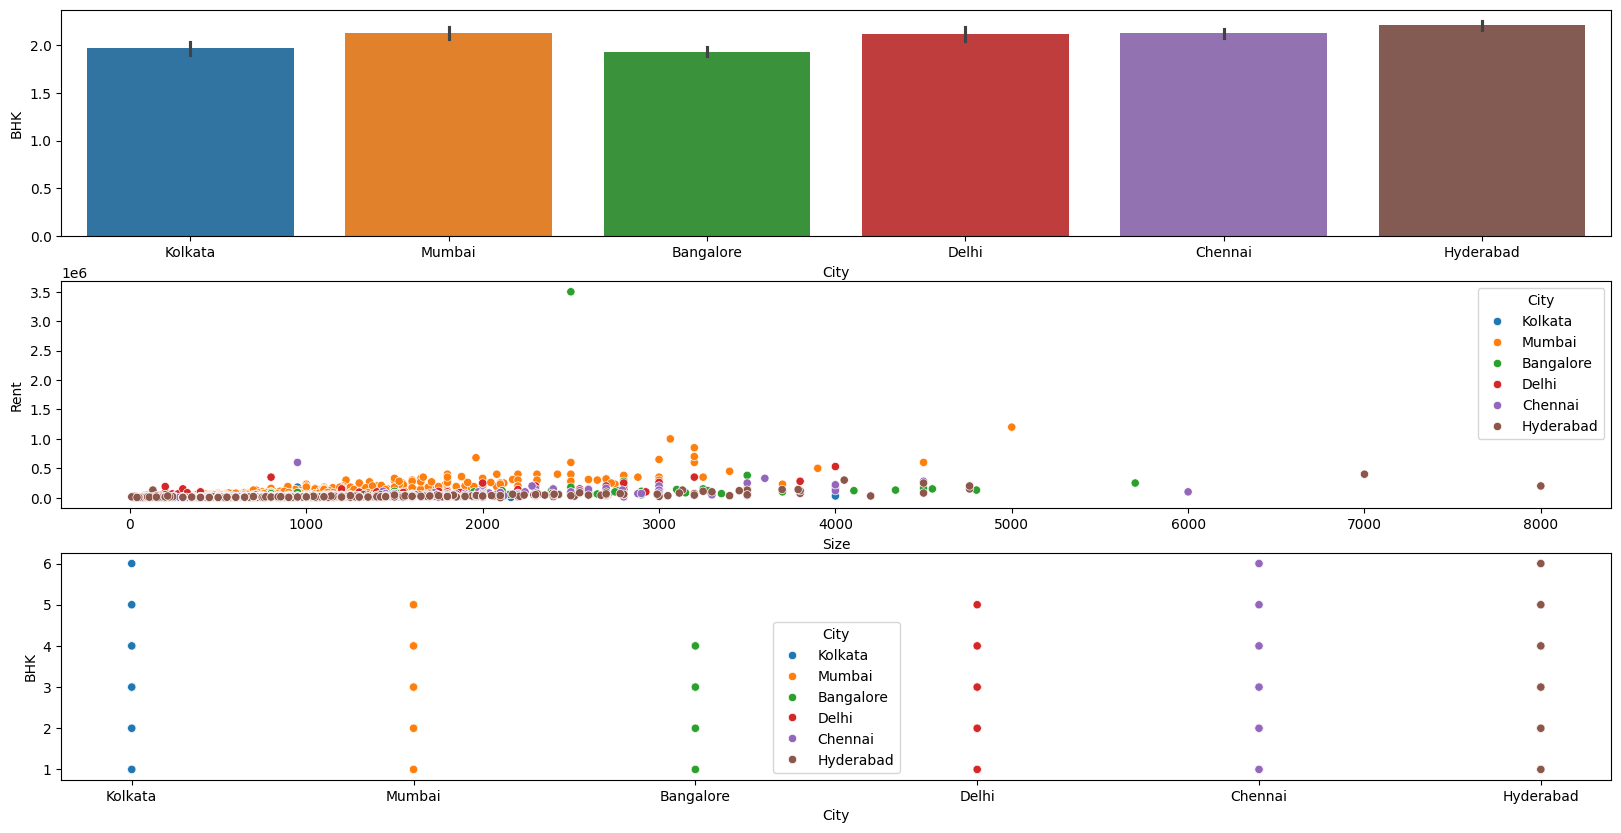

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(20,10))

sns.barplot(data=rent_data, x='City', y='BHK', ax=axes[0], hue='City')
sns.scatterplot(data=rent_data, x='Size', y='Rent', ax=axes[1],hue='City')
sns.scatterplot(data=rent_data, x='City', y='BHK', ax=axes[2],hue='City')



1. CORRELATION

In [11]:
rent_data.columns

Index(['Unnamed: 0', 'Posted On', 'BHK', 'Rent', 'Size', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'house_floor', 'no_floor'],
      dtype='object')

Text(0.5, 1.0, 'Spearman Rank Correlation')

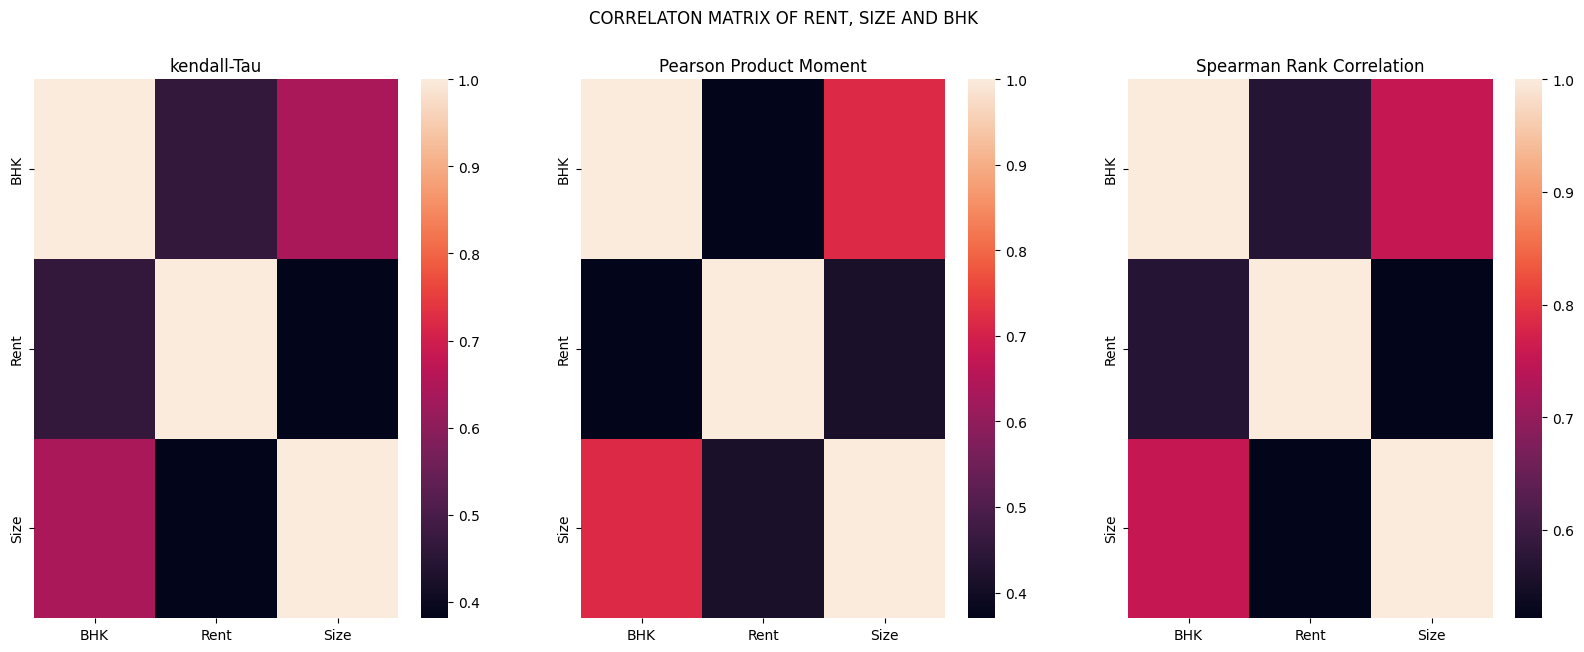

In [17]:
kendall_corr = rent_data[['BHK', 'Rent', 'Size']].corr('kendall')
pearson_corr = rent_data[['BHK', 'Rent', 'Size']].corr('pearson')
spearman_corr = rent_data[['BHK', 'Rent', 'Size']].corr('spearman')

fig, axes = plt.subplots(1,  3, figsize=(20, 7))

sns.heatmap(data=kendall_corr, ax=axes[0])
sns.heatmap(data=pearson_corr, ax=axes[1])
sns.heatmap(data=spearman_corr, ax=axes[2])

plt.suptitle('CORRELATON MATRIX OF RENT, SIZE AND BHK')

axes[0].set_title('kendall-Tau')
axes[1].set_title('Pearson Product Moment')
axes[2].set_title('Spearman Rank Correlation')

Text(0.5, 1.0, 'Spearman Rank Correlation')

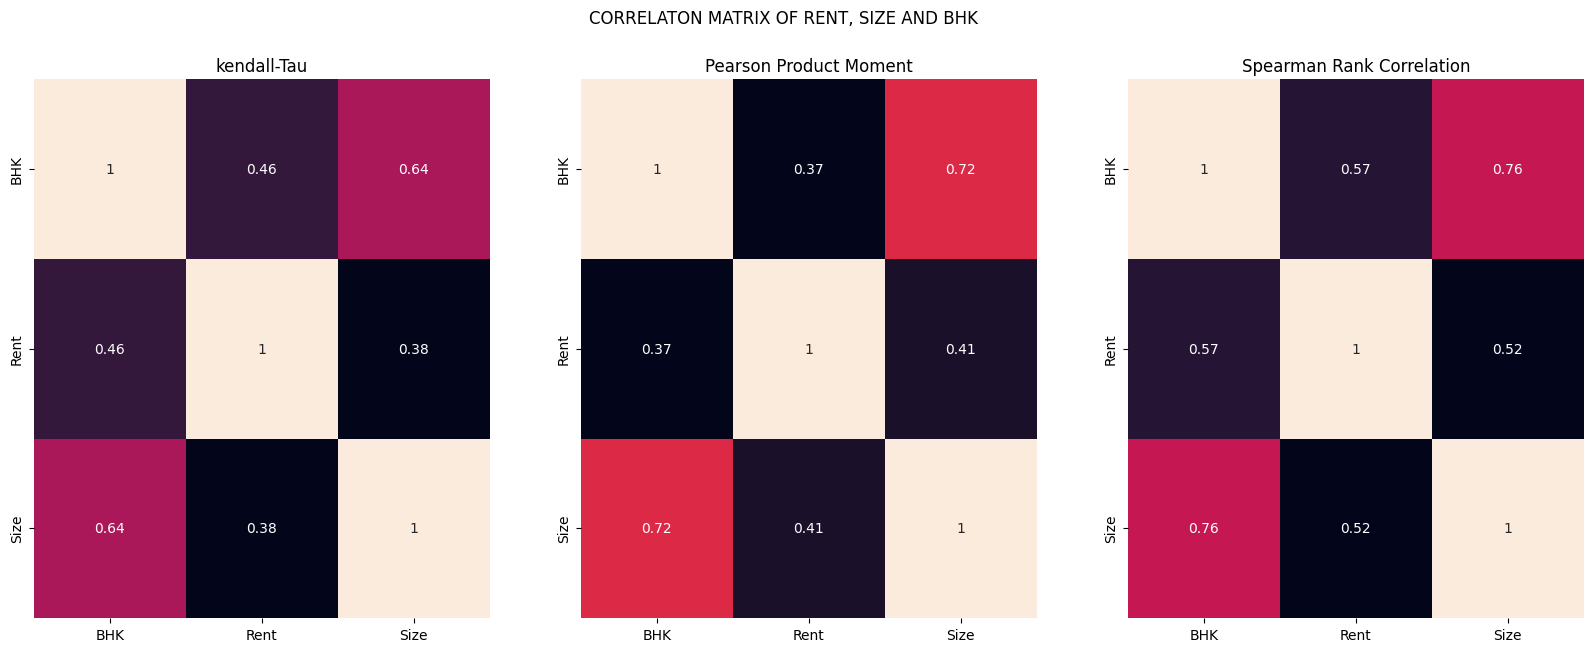

In [19]:
kendall_corr = rent_data[['BHK', 'Rent', 'Size']].corr('kendall')
pearson_corr = rent_data[['BHK', 'Rent', 'Size']].corr('pearson')
spearman_corr = rent_data[['BHK', 'Rent', 'Size']].corr('spearman')

fig, axes = plt.subplots(1,  3, figsize=(20, 7))

sns.heatmap(data=kendall_corr, ax=axes[0], annot=True, cbar=False)
sns.heatmap(data=pearson_corr, ax=axes[1], annot=True, cbar=False)
sns.heatmap(data=spearman_corr, ax=axes[2], annot=True, cbar=False)

plt.suptitle('CORRELATON MATRIX OF RENT, SIZE AND BHK')

axes[0].set_title('kendall-Tau')
axes[1].set_title('Pearson Product Moment')
axes[2].set_title('Spearman Rank Correlation')

## Insight

In [20]:
# testing for normality -- using shapiro wilk/komogrov smirnov

from scipy.stats import shapiro

In [21]:
Ho = 'There is normality'
H1 = 'There is no normality'

stats, p_value = shapiro(rent_data['BHK'].values)

if p_value < 0.05:
    print(f'{H1} in BHK')
else:
    print(f'{Ho} in BHK')
print(p_value)

There is no normality in BHK
2.6568928755927767e-55


In [22]:
Ho = 'There is normality'
H1 = 'There is no normality'

stats, p_value = shapiro(rent_data['Rent'].values)

if p_value < 0.05:
    print(f'{H1} in BHK')
else:
    print(f'{Ho} in BHK')
print(p_value)

There is no normality in BHK
1.6265682261755304e-86


In [23]:
Ho = 'There is normality'
H1 = 'There is no normality'

stats, p_value = shapiro(rent_data['Size'].values)

if p_value < 0.05:
    print(f'{H1} in BHK')
else:
    print(f'{Ho} in BHK')
print(p_value)

There is no normality in BHK
5.376498206816902e-56


In [24]:
Ho = 'There is normality'
H1 = 'There is no normality'

col_test = {}
col_list = ['BHK', 'Rent', 'Size']

for col in col_list:
    stats, p_value = shapiro(rent_data[col].values)
    stats_list = [stats, p_value]
    col_test.update({col: stats_list})

for i, v in col_test.items():
    if v[1] < 0.05:
        print(f'{H1} in {i} @ p-value = {v[1]}')
    else:
        print(f'{Ho} in {i} @ p-value =  {v[1]}')

There is no normality in BHK @ p-value = 2.6568928755927767e-55
There is no normality in Rent @ p-value = 1.6265682261755304e-86
There is no normality in Size @ p-value = 5.376498206816902e-56
